In [2]:
##author:Shreya Bagchi

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('CD_data_wo_outliers.csv')
data.head()


,Division Key,RDD_Year_Key,RDD_Month_Key,SID,Zone,shipping_key,Shipment_Original_Destination_Appt_Date,Shipment_Revised_Destination_Appt_Date,Shipment_Arrive_at_Destination_Date,Goods_Issue _Date_SystemA,...,Is_Ship_date_revised,Is_tech_issue,scaled_transportation_lead_time,scaled_shipment_weight,scaled_shipment_volume,scaled_transit_time,cust_size,Rev_Recog_year,late_ind,Late_Period
0,10,2014,1,12300044.0,MO,SM,02-01-2014,02-01-2014,2014-01-02,29-12-2013,...,0,0,0.162791,0.218056,0.155546,0.750000,1,2014,0,-1 days +00:00:00.000000000
1,10,2014,1,12340731.0,OH,SM,30-12-2013,30-12-2013,2013-12-30,20-12-2013,...,0,0,0.093023,0.000358,0.000168,0.750000,3,2013,0,-2 days +00:00:00.000000000
2,11,2014,1,12360910.0,PA,SM,30-12-2013,30-12-2013,2013-12-30,26-12-2013,...,0,0,0.162791,0.000326,0.000337,0.666667,3,2013,0,-4 days +00:00:00.000000000
3,11,2014,1,12360913.0,PA,SM,27-12-2013,27-12-2013,2013-12-27,26-12-2013,...,0,0,0.162791,0.000326,0.000337,0.666667,3,2013,0,-7 days +00:00:00.000000000
4,11,2014,1,12360916.0,PA,SM,31-12-2013,31-12-2013,2013-12-31,26-12-2013,...,0,0,0.116279,0.000326,0.000337,0.833333,3,2013,0,-3 days +00:00:00.000000000


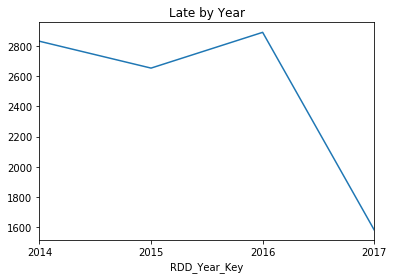

In [4]:
data[data['late_ind'] == 1].groupby('RDD_Year_Key').size().plot(kind='line', title='Late by Year', xticks=[2014,2015,2016,2017])

In [5]:
late_data = data[data['late_ind']==1]

In [6]:
tm_data = late_data.groupby(['RDD_Year_Key','RDD_Month_Key'])['late_ind'].size().to_frame(name='frequency')

In [7]:
late_data.groupby(['RDD_Year_Key','RDD_Month_Key'])['late_ind'].size().to_frame(name='frequency')

frequency
RDD_Year_Key RDD_Month_Key           
2014         1                    241
             2                    415
             3                    248
             4                    177
             5                    105
             6                    264
             7                    220
             8                    140
             9                    209
             10                   327
             11                   241
             12                   245
2015         1                    127
             2                    180
             3                    316
             4                    202
             5                    101
             6                    247
             7                    242
             8                    216
             9                    262
             10                   108
             11                   245
             12                   408
2016         1                    179
             2                    261
             3                    172
             4                    104
             5                    200
             6                    324
             7                    112
             8                    220
             9                    479
             10                   244
             11                   281
             12                   315
2017         1                    282
             2                    190
             3                    466
             4                    104
             5                    239
             6                    300

tm_data.head(20)

In [8]:
tm_data.tail(20)

frequency
RDD_Year_Key RDD_Month_Key           
2015         11                   245
             12                   408
2016         1                    179
             2                    261
             3                    172
             4                    104
             5                    200
             6                    324
             7                    112
             8                    220
             9                    479
             10                   244
             11                   281
             12                   315
2017         1                    282
             2                    190
             3                    466
             4                    104
             5                    239
             6                    300

In [9]:
tm_data.columns

Index(['frequency'], dtype='object')

In [10]:
date_rng = pd.date_range(start='1/2014', end='07/2017', freq='M')

In [11]:
date_rng

DatetimeIndex(['2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30'],
              dtype='datetime64[ns]', freq='M')

In [12]:
tm_data['date']=date_rng

In [30]:
tm_data.head()

,frequency
0,241
1,415
2,248
3,177
4,105


In [14]:
tm_data['date'] = pd.to_datetime(tm_data['date'])

In [16]:
type(tm_data['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [28]:
filename="Time_Series_CD.csv"
tm_data.to_csv(filename,encoding="utf8",index=False)

In [29]:
tm_data = pd.read_csv('Time_Series_CD.csv')
tm_data.head()

,frequency
0,241
1,415
2,248
3,177
4,105


In [26]:
tm_data.set_index(["date"], inplace = True, 
                             append = True, drop = True)

In [27]:
tm_data.index

MultiIndex([( 0, '2014-01-31'),
            ( 1, '2014-02-28'),
            ( 2, '2014-03-31'),
            ( 3, '2014-04-30'),
            ( 4, '2014-05-31'),
            ( 5, '2014-06-30'),
            ( 6, '2014-07-31'),
            ( 7, '2014-08-31'),
            ( 8, '2014-09-30'),
            ( 9, '2014-10-31'),
            (10, '2014-11-30'),
            (11, '2014-12-31'),
            (12, '2015-01-31'),
            (13, '2015-02-28'),
            (14, '2015-03-31'),
            (15, '2015-04-30'),
            (16, '2015-05-31'),
            (17, '2015-06-30'),
            (18, '2015-07-31'),
            (19, '2015-08-31'),
            (20, '2015-09-30'),
            (21, '2015-10-31'),
            (22, '2015-11-30'),
            (23, '2015-12-31'),
            (24, '2016-01-31'),
            (25, '2016-02-29'),
            (26, '2016-03-31'),
            (27, '2016-04-30'),
            (28, '2016-05-31'),
            (29, '2016-06-30'),
            (30, '2016-07-31'),
        

In [17]:
tm_data.reset_index(level = 'RDD_Year_Key', inplace = True)

KeyError: 'Level RDD_Year_Key not found'

In [16]:
tm_data.reset_index(level = 'RDD_Month_Key', inplace = True)

In [18]:
tm_data.columns

Index(['frequency'], dtype='object')

In [19]:
tm_data.drop('RDD_Year_Key',axis=1,inplace=True)

KeyError: "['RDD_Year_Key'] not found in axis"

In [19]:
tm_data.drop('RDD_Month_Key',axis=1,inplace=True)

In [20]:
tm_data.tail(10)

,,frequency
,date,
32,2016-09-30,479
33,2016-10-31,244
34,2016-11-30,281
35,2016-12-31,315
36,2017-01-31,282
37,2017-02-28,190
38,2017-03-31,466
39,2017-04-30,104
40,2017-05-31,239


In [21]:
tm_data.index

MultiIndex([( 0, '2014-01-31'),
            ( 1, '2014-02-28'),
            ( 2, '2014-03-31'),
            ( 3, '2014-04-30'),
            ( 4, '2014-05-31'),
            ( 5, '2014-06-30'),
            ( 6, '2014-07-31'),
            ( 7, '2014-08-31'),
            ( 8, '2014-09-30'),
            ( 9, '2014-10-31'),
            (10, '2014-11-30'),
            (11, '2014-12-31'),
            (12, '2015-01-31'),
            (13, '2015-02-28'),
            (14, '2015-03-31'),
            (15, '2015-04-30'),
            (16, '2015-05-31'),
            (17, '2015-06-30'),
            (18, '2015-07-31'),
            (19, '2015-08-31'),
            (20, '2015-09-30'),
            (21, '2015-10-31'),
            (22, '2015-11-30'),
            (23, '2015-12-31'),
            (24, '2016-01-31'),
            (25, '2016-02-29'),
            (26, '2016-03-31'),
            (27, '2016-04-30'),
            (28, '2016-05-31'),
            (29, '2016-06-30'),
            (30, '2016-07-31'),
        

In [23]:
# Prepare data
tm_data['year'] = [d.year for d in tm_data.index]
tm_data['month'] = [d.strftime('%b') for d in tm_data.index]
years = tm_data['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='frequency', data=tm_data, ax=axes[0])
sns.boxplot(x='month', y='frequency', data=tm_data.loc[~tm_data.year.isin([2014,2017]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

AttributeError: 'tuple' object has no attribute 'year'

In [27]:
tm_data.head()

,frequency,year,month
date,,,
2014-01-31,241,2014,Jan
2014-02-28,415,2014,Feb
2014-03-31,248,2014,Mar
2014-04-30,177,2014,Apr
2014-05-31,105,2014,May


In [43]:
tm_data.tail()

,frequency,year,month
date,,,
2017-02-28,190,2017,Feb
2017-03-31,466,2017,Mar
2017-04-30,104,2017,Apr
2017-05-31,239,2017,May
2017-06-30,300,2017,Jun


In [22]:
Train=tm_data.ix['2014-01-31':'2017-03-31']

C:\Users\Shreya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


TypeError: Level type mismatch: 2014-01-31

In [65]:
valid=tm_data.ix['2017-03-31':'2017-06-30']

C:\Users\Shreya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


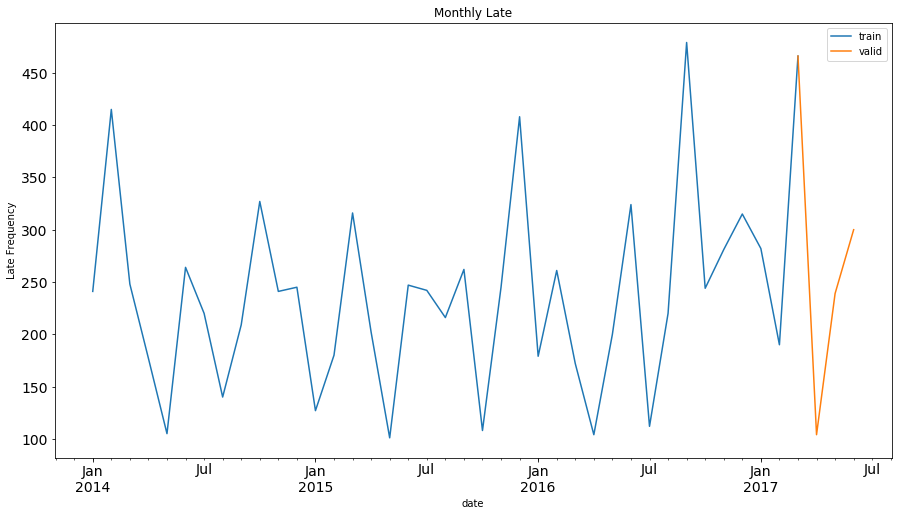

In [67]:
Train['frequency'].plot(figsize=(15,8), title= 'Monthly Late', fontsize=14, label='train') 
valid['frequency'].plot(figsize=(15,8), title= 'Monthly Late', fontsize=14, label='valid') 
plt.xlabel("date") 
plt.ylabel("Late Frequency") 
plt.legend(loc='best') 
plt.show()

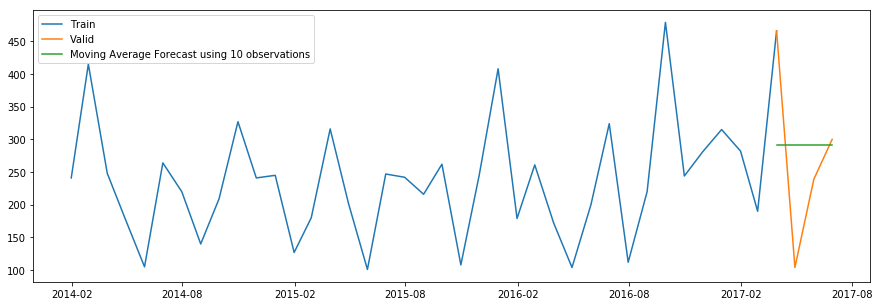

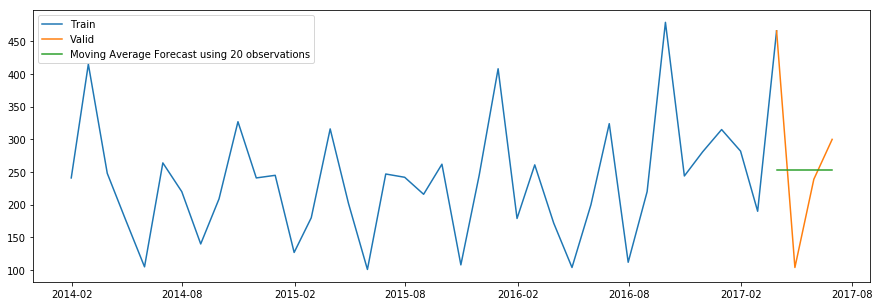

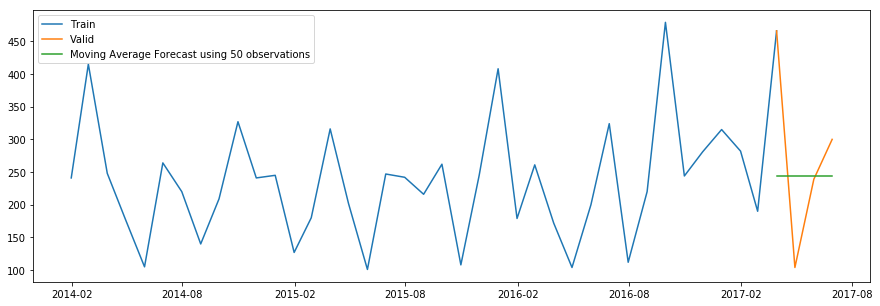

In [68]:
## Moving Average

y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['frequency'].rolling(10).mean().iloc[-1] # average of last 10 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['frequency'], label='Train') 
plt.plot(valid['frequency'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations') 
plt.legend(loc='best') 
plt.show() 
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['frequency'].rolling(20).mean().iloc[-1] # average of last 20 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['frequency'], label='Train') 
plt.plot(valid['frequency'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 20 observations') 
plt.legend(loc='best') 
plt.show() 
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['frequency'].rolling(30).mean().iloc[-1] # average of last 50 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['frequency'], label='Train') 
plt.plot(valid['frequency'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations') 
plt.legend(loc='best') 
plt.show()


In [61]:
from sklearn.metrics import mean_squared_error 
from math import sqrt 

In [69]:
rms = sqrt(mean_squared_error(valid['frequency'], y_hat_avg.moving_avg_forecast)) 
print(rms)

134.40643585781152


In [ ]:
## Simple Exponential Smoothing

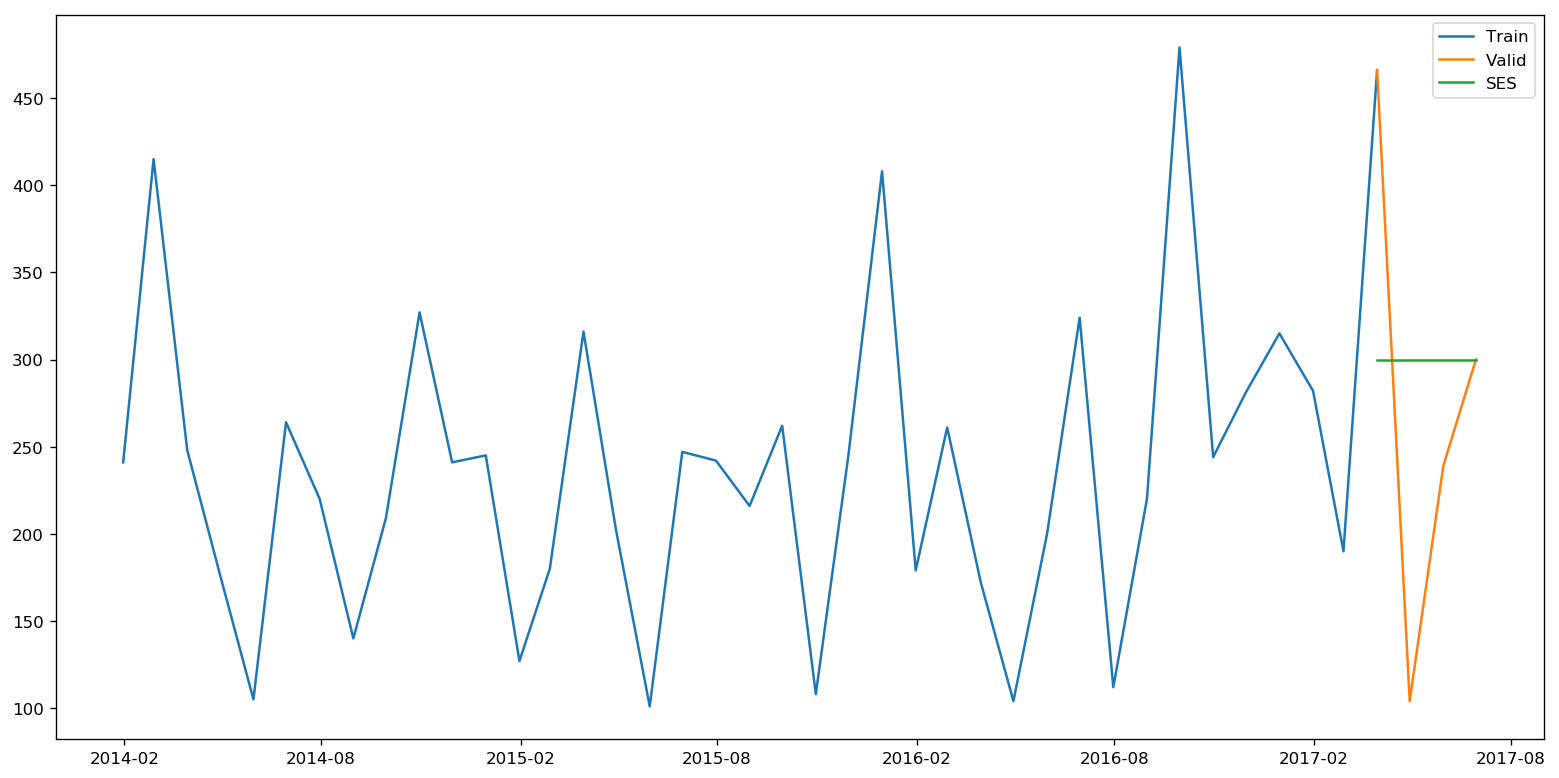

In [143]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt 
y_hat_avg = valid.copy() 
ses = SimpleExpSmoothing(np.asarray(Train['frequency']))
fit2 = ses.fit(smoothing_level=0.2,optimized=False) 
y_hat_avg['SES'] = fit2.forecast(len(valid)) 
plt.figure(figsize=(16,8)) 
plt.plot(Train['frequency'], label='Train') 
plt.plot(valid['frequency'], label='Valid') 
plt.plot(y_hat_avg['SES'], label='SES') 
plt.legend(loc='best') 
plt.show()

In [144]:
rms = sqrt(mean_squared_error(valid['frequency'], y_hat_avg.SES)) 
print(rms)

131.9013638075081


In [ ]:
## We can infer that the rmse value hasn't improved much

## y_hat_avg = valid.copy() 
holts = Holt(np.asarray(Train['frequency']))
fit1 = holts.fit(smoothing_level = 0.1,smoothing_slope = 0.1) 
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid)) 
plt.figure(figsize=(16,8)) 
plt.plot(Train['frequency'], label='Train') 
plt.plot(valid['frequency'], label='Valid') 
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear') 
plt.legend(loc='best') 
plt.show()


In [142]:
rms = sqrt(mean_squared_error(valid['frequency'], y_hat_avg.Holt_linear)) 
print(rms)

132.29951977186815


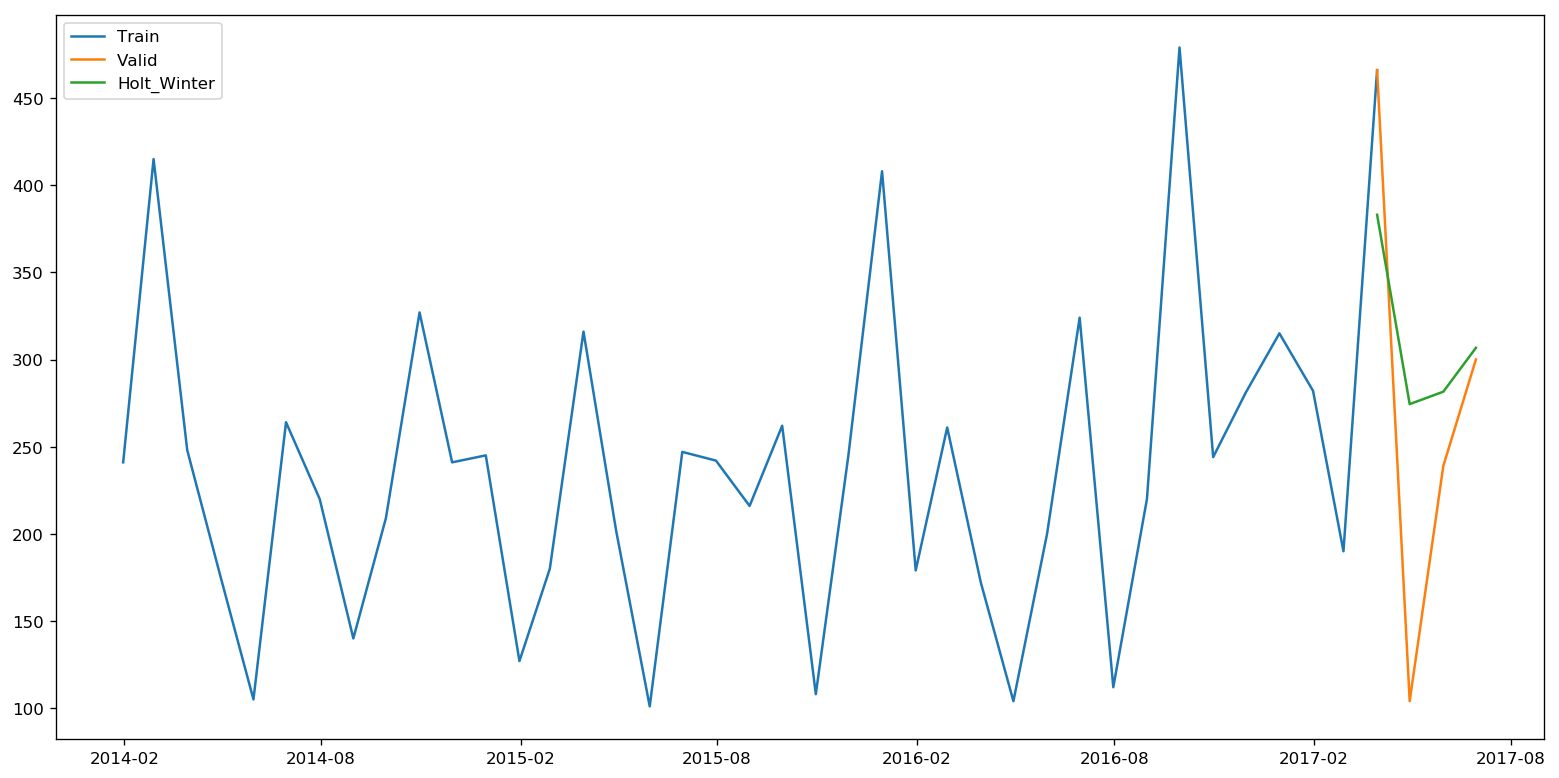

In [152]:
y_hat_avg = valid.copy() 
fit1 = ExponentialSmoothing(np.asarray(Train['frequency']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit() 
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid)) 
plt.figure(figsize=(16,8)) 
plt.plot( Train['frequency'], label='Train') 
plt.plot(valid['frequency'], label='Valid') 
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter') 
plt.legend(loc='best') 
plt.show()

In [153]:
rms = sqrt(mean_squared_error(valid['frequency'], y_hat_avg['Holt_Winter'])) 
print(rms)


97.18267853203429


In [ ]:
# Decomposing the series

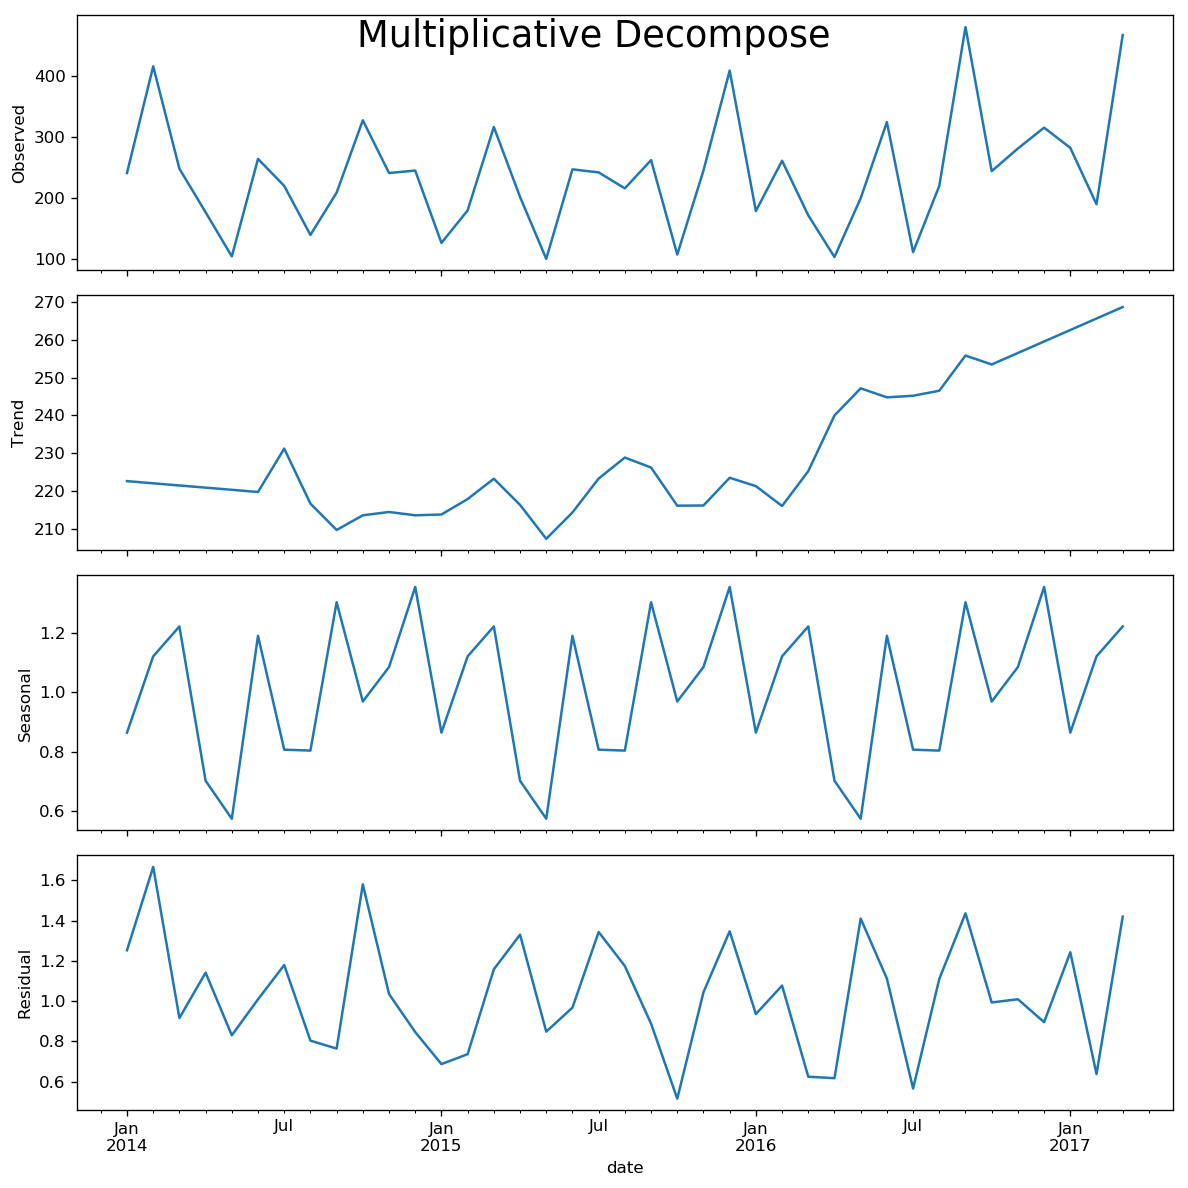

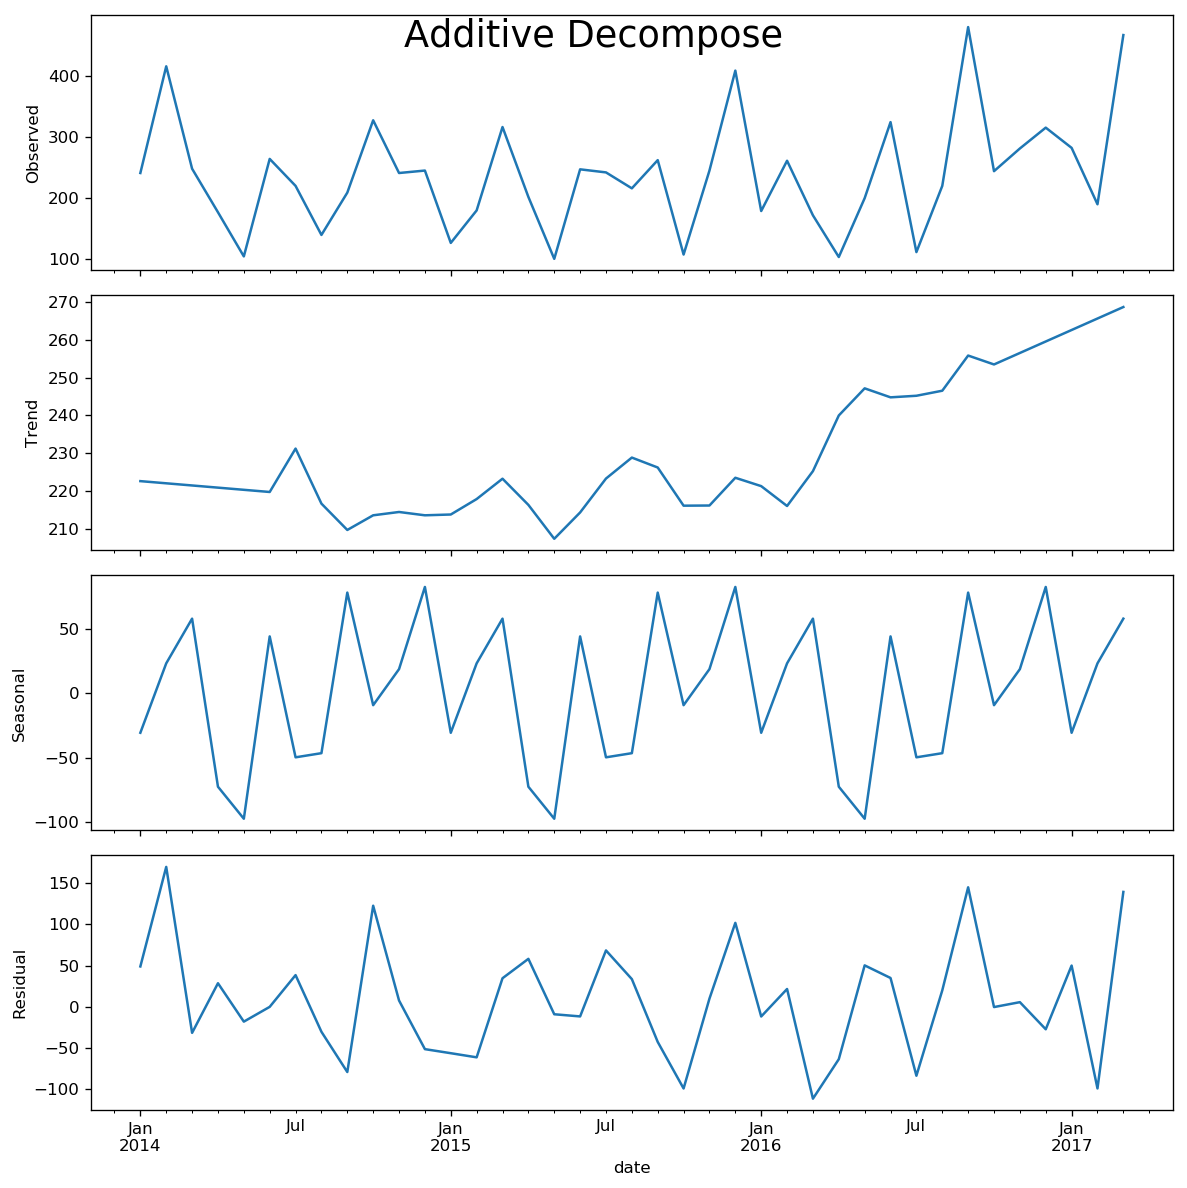

In [155]:
result_mul = sm.tsa.seasonal_decompose(Train['frequency'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = sm.tsa.seasonal_decompose(Train['frequency'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

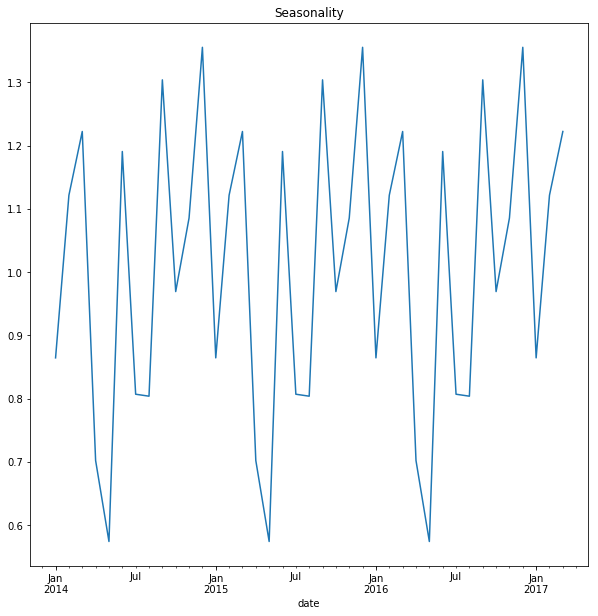

In [75]:
result_mul.seasonal.plot(title="Seasonality")

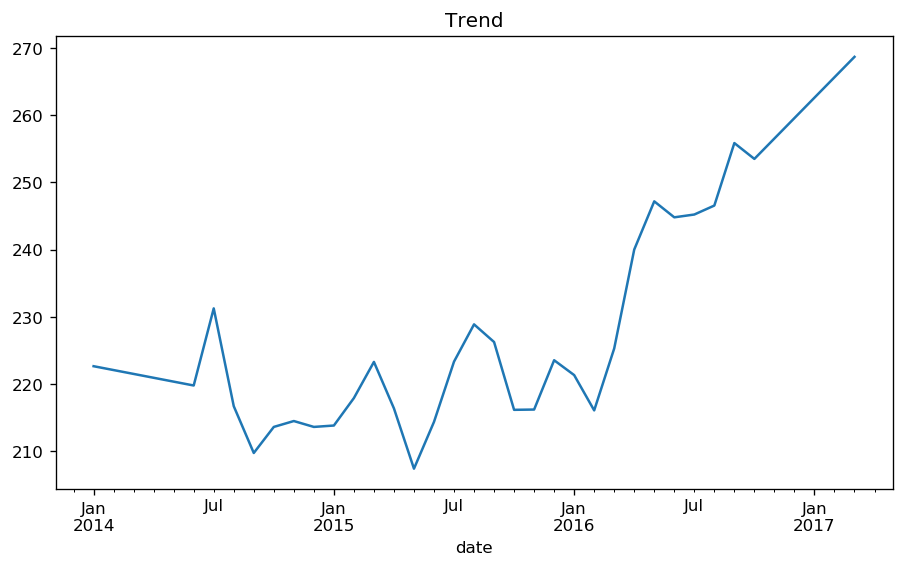

In [77]:
result_mul.trend.plot(title="Trend")

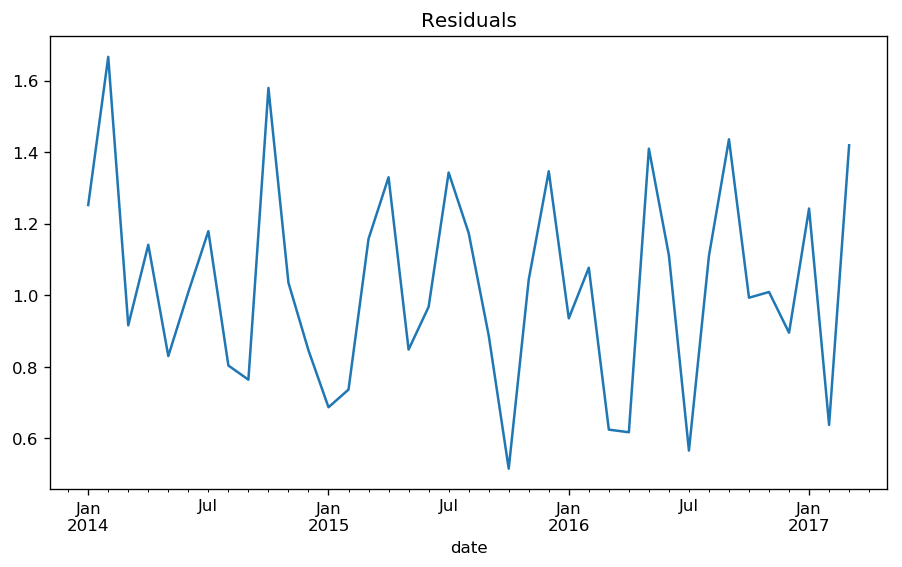

In [78]:
result_mul.resid.plot(title="Residuals")

In [ ]:
## Using Dickey-Fuller Test to check stationarity

In [79]:
from statsmodels.tsa.stattools import adfuller 
def test_stationarity(timeseries):
        #Determing rolling statistics
    rolmean = pd.Series.rolling(timeseries, window=12).mean() # 24 hours per day
    rolstd = pd.Series.rolling(timeseries, window=12).std()
        #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
        #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)



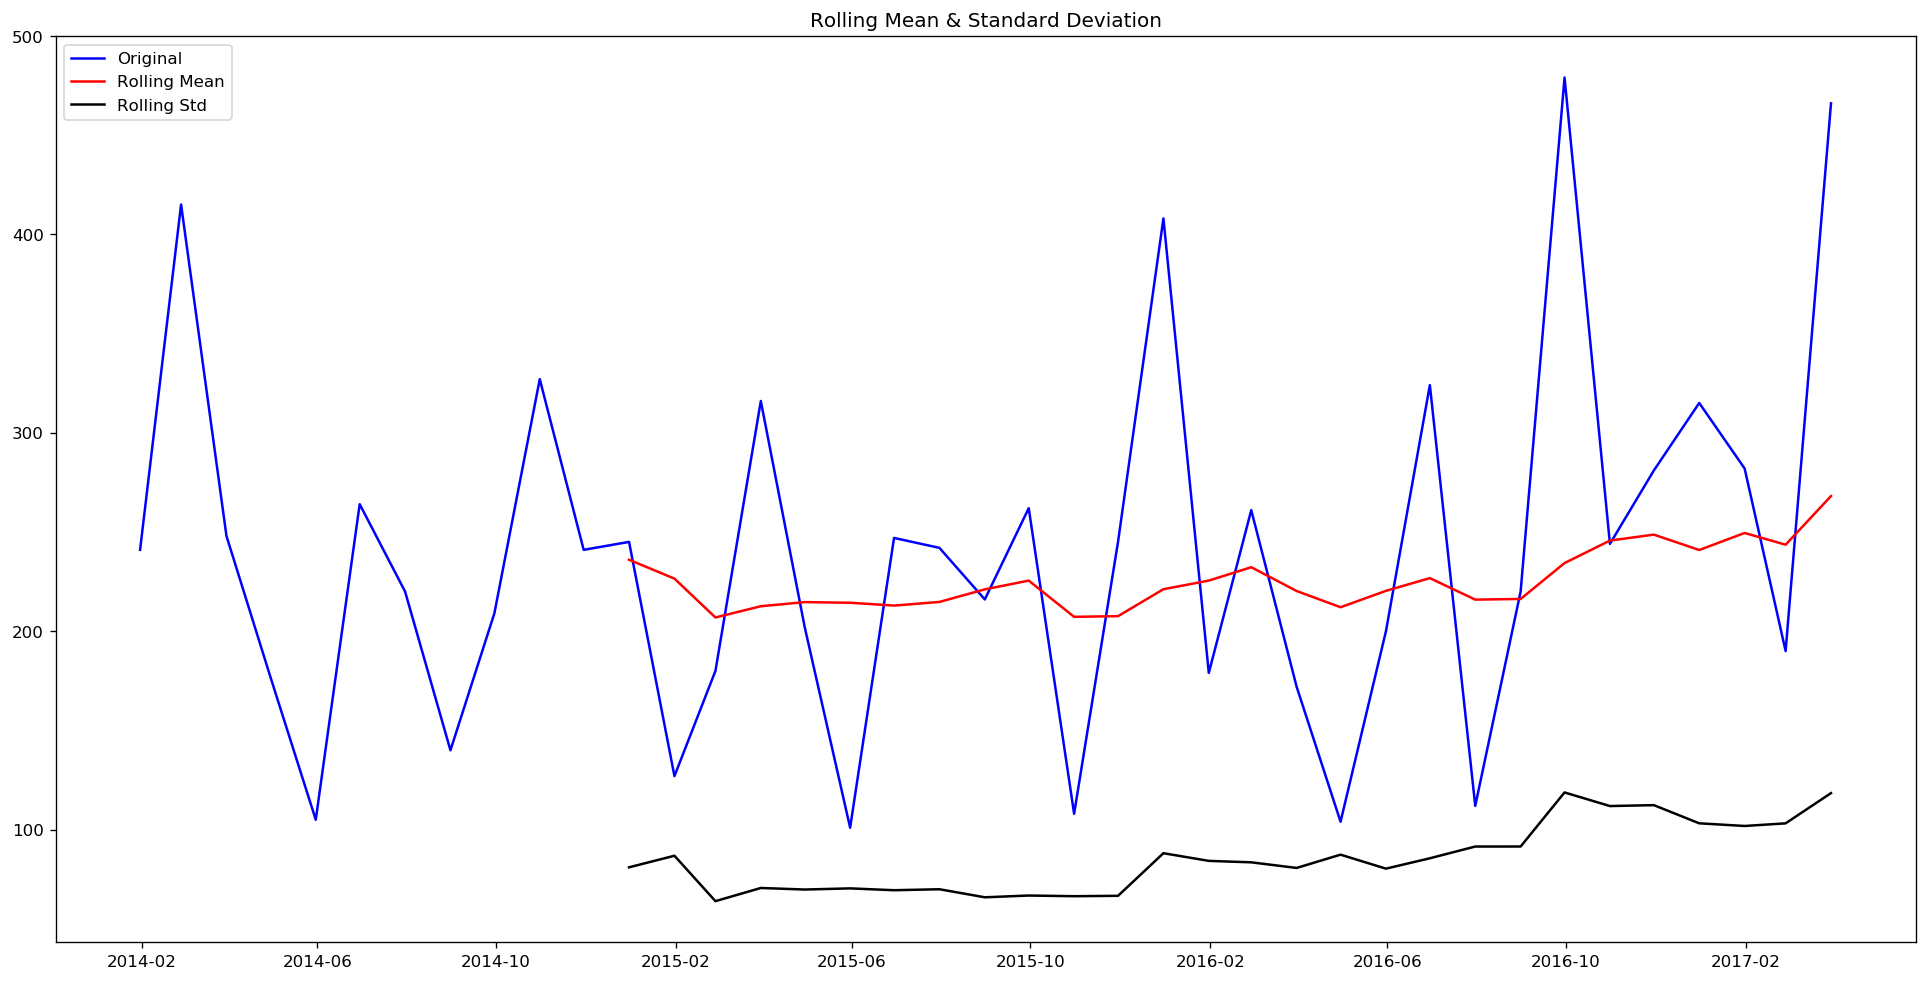

Results of Dickey-Fuller Test:
Test Statistic                  0.169083
p-value                         0.970473
#Lags Used                      8.000000
Number of Observations Used    30.000000
Critical Value (1%)            -3.669920
Critical Value (5%)            -2.964071
Critical Value (10%)           -2.621171
dtype: float64


In [80]:
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 20,10
test_stationarity(Train['frequency'])

In [81]:
from statsmodels.tsa.stattools import adfuller, kpss

In [154]:
# ADF Test
result = adfuller(Train['frequency'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')



ADF Statistic: 0.16908252454966352
p-value: 0.9704732295197231
Critial Values:
   1%, -3.6699197407407405
Critial Values:
   5%, -2.9640707407407407
Critial Values:
   10%, -2.621171111111111


In [ ]:
#The p-val > Critical value[0.05], so we fail to reject the null hypothesis that the series is not-stationary.

In [ ]:
# Transforming the Freq term by using log function
# Removing the trend by subtracting the MA.

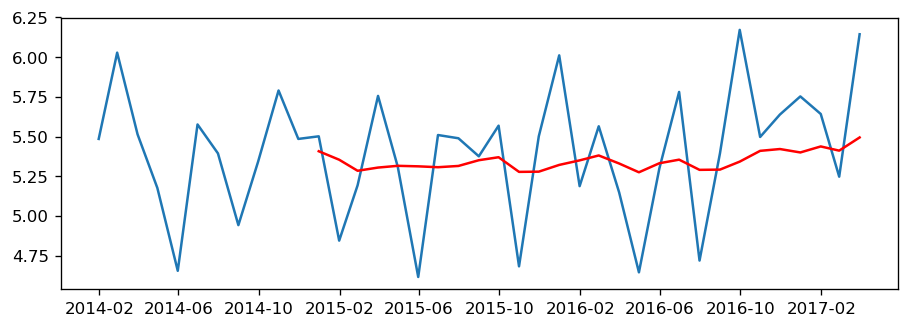

In [209]:
Train_log = np.log(Train['frequency']) 
valid_log = np.log(valid['frequency'])
moving_avg = pd.Series.rolling(Train_log, 12).mean() 
plt.plot(Train_log) 
plt.plot(moving_avg, color = 'red') 
plt.show()

In [159]:
train_log_moving_avg_diff = Train_log - moving_avg

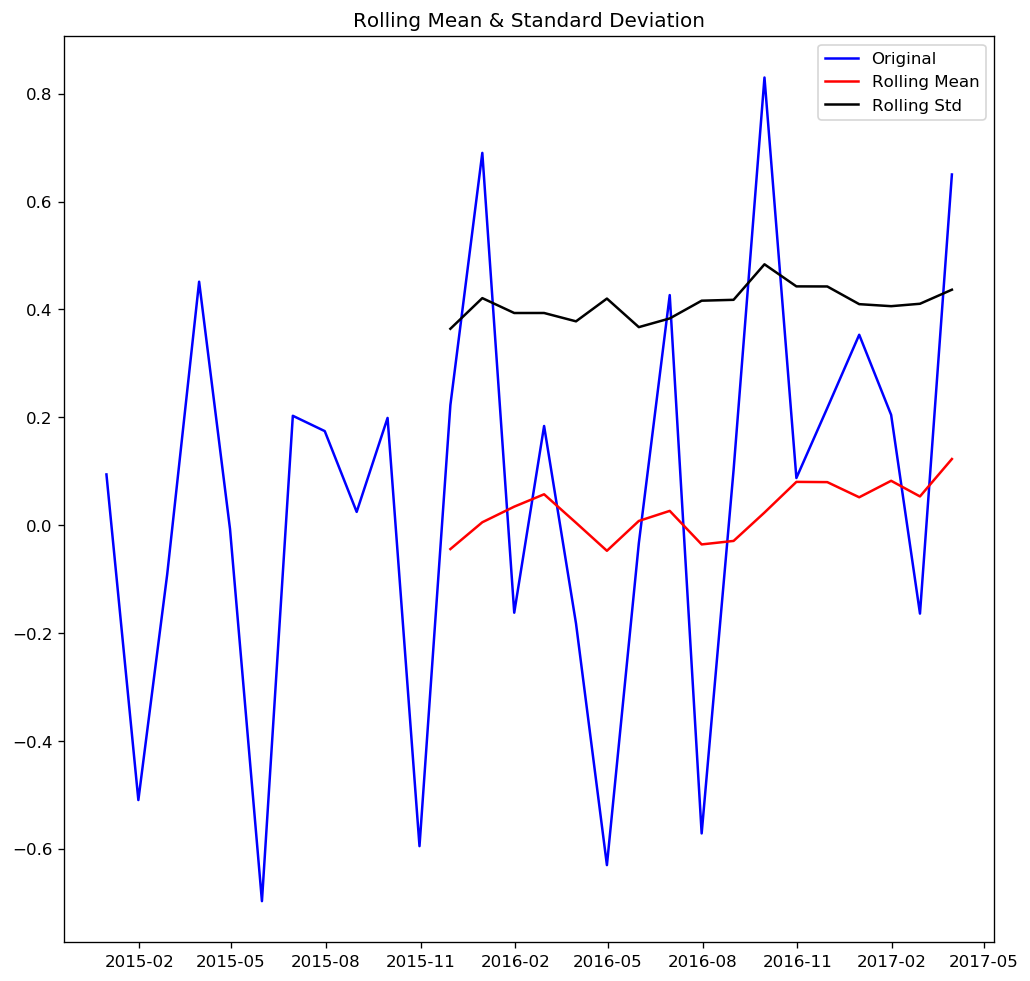

Results of Dickey-Fuller Test:
Test Statistic                 -2.387507
p-value                         0.145294
#Lags Used                      2.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


In [160]:
train_log_moving_avg_diff.dropna(inplace = True) 
test_stationarity(train_log_moving_avg_diff)

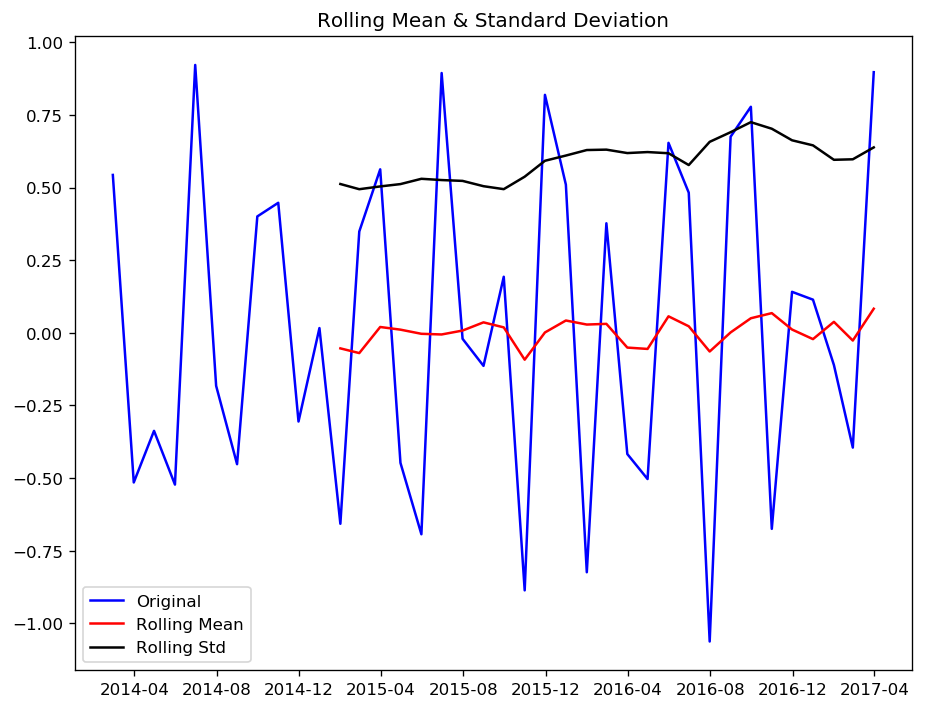

Results of Dickey-Fuller Test:
Test Statistic                -6.037329e+00
p-value                        1.372097e-07
#Lags Used                     3.000000e+00
Number of Observations Used    3.400000e+01
Critical Value (1%)           -3.639224e+00
Critical Value (5%)           -2.951230e+00
Critical Value (10%)          -2.614447e+00
dtype: float64


In [193]:
train_log_diff = Train_log - Train_log.shift(1) 
test_stationarity(train_log_diff.dropna())

In [ ]:
#Differencing helps to make the series stable and eliminate the trend.

In [197]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

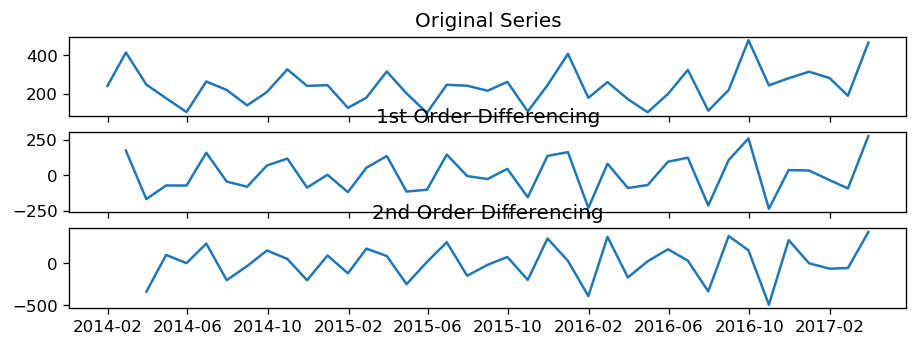

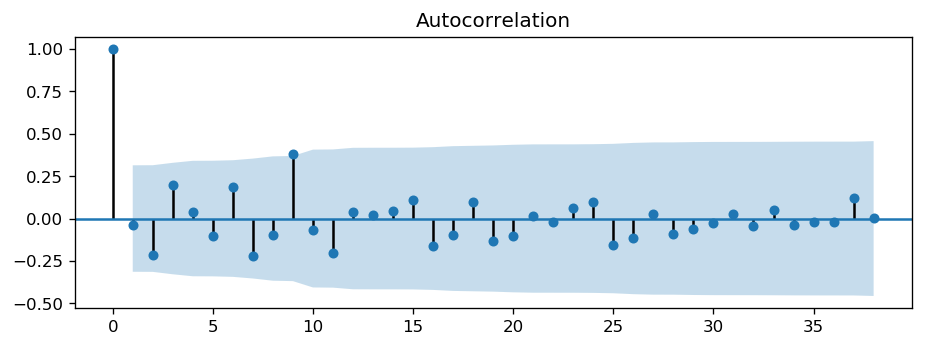

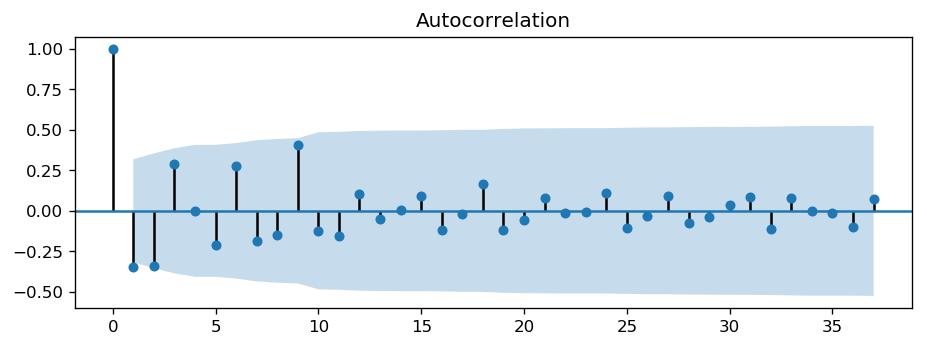

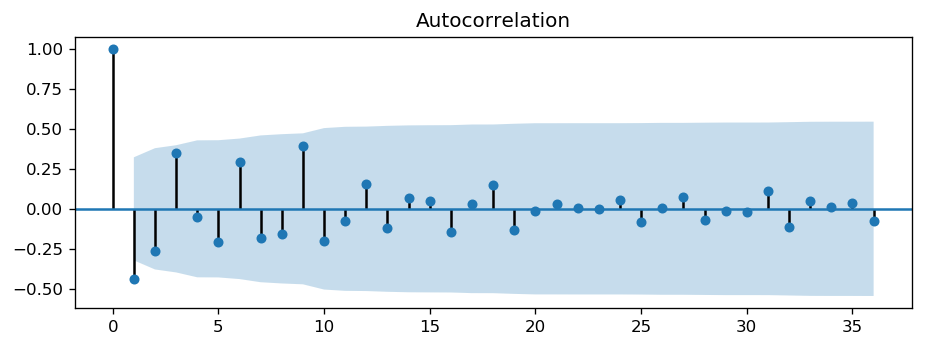

In [222]:
fig, axes = plt.subplots(3, 1, sharex=True)
axes[0].plot(Train['frequency'])
axes[0].set_title('Original Series') 
#plt.show() 
plot_acf(Train['frequency'])

# 1st Differencing
axes[1].plot(Train['frequency'].diff()); 
axes[1].set_title('1st Order Differencing')
plot_acf(Train['frequency'].diff().dropna())

# 2nd Differencing
axes[2].plot(Train['frequency'].diff().diff()); 
axes[2].set_title('2nd Order Differencing')
plot_acf(Train['frequency'].diff().diff().dropna())

plt.show()

In [194]:
from statsmodels.tsa.stattools import acf, pacf 
lag_acf = acf(train_log_diff.dropna(), nlags=15) 
lag_pacf = pacf(train_log_diff.dropna(), nlags=15, method='ols')

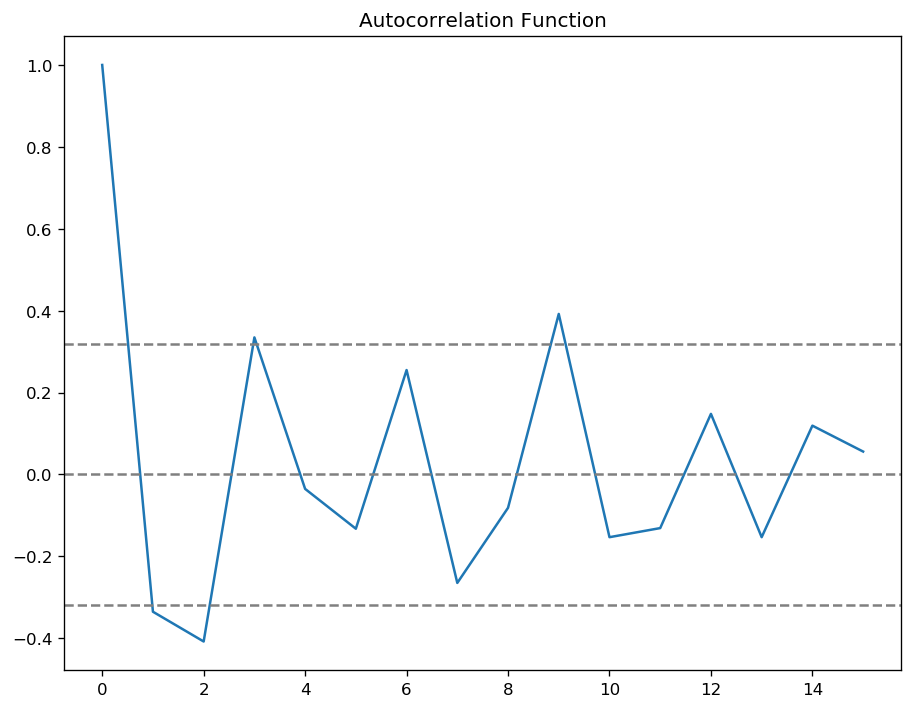

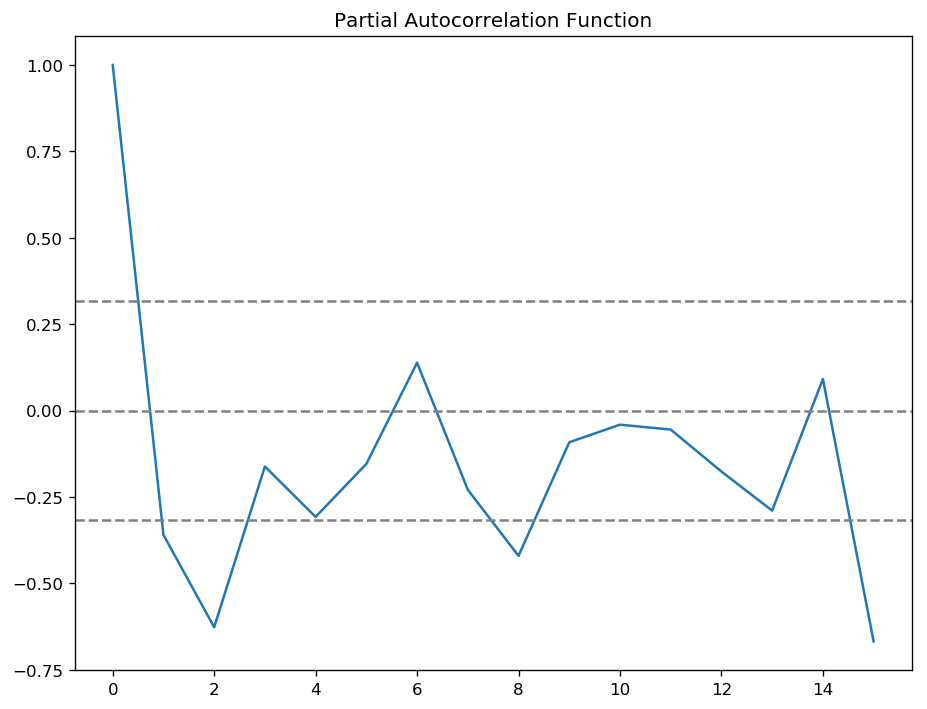

In [195]:
plt.plot(lag_acf) 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.title('Autocorrelation Function') 
plt.show() 
plt.plot(lag_pacf) 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.title('Partial Autocorrelation Function') 
plt.show()

In [212]:
## AR Model with 1,1,0

from statsmodels.tsa.arima_model import ARIMA
ar_model_log = ARIMA(Train_log, order=(1, 1, 0))  # here the q value is zero since it is just the AR model 
ar_model_log_fit = ar_model_log.fit(disp=0)  
print(ar_model_log_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.frequency   No. Observations:                   38
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 -29.827
Method:                       css-mle   S.D. of innovations              0.529
Date:                Wed, 14 Aug 2019   AIC                             65.653
Time:                        19:00:44   BIC                             70.566
Sample:                    02-28-2014   HQIC                            67.401
                         - 03-31-2017                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0075      0.064      0.117      0.908      -0.118       0.132
ar.L1.D.frequency    -0.3582      0.156     -2.290      0.028      -0.665      -0.052
                        

C:\Users\Shreya\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\Shreya\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [213]:
## MA Model with 0,1,1

from statsmodels.tsa.arima_model import ARIMA
ma_model_log = ARIMA(Train_log, order=(0, 1, 1))  # here the p value is zero since it is just the AR model 
ma_model_log_fit = ma_model_log.fit(disp=0)  
print(ma_model_log_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.frequency   No. Observations:                   38
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -20.884
Method:                       css-mle   S.D. of innovations              0.399
Date:                Wed, 14 Aug 2019   AIC                             47.769
Time:                        19:00:56   BIC                             52.682
Sample:                    02-28-2014   HQIC                            49.517
                         - 03-31-2017                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0059      0.006      1.033      0.309      -0.005       0.017
ma.L1.D.frequency    -1.0000      0.089    -11.264      0.000      -1.174      -0.826
                        

C:\Users\Shreya\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\Shreya\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [214]:
## ARIMA Model with 1,1,1

from statsmodels.tsa.arima_model import ARIMA
arima_model_log = ARIMA(Train_log, order=(1, 1, 1))  
arima_model_log_fit = arima_model_log.fit(disp=0)  
print(arima_model_log_fit.summary())

C:\Users\Shreya\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\Shreya\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:            D.frequency   No. Observations:                   38
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -20.881
Method:                       css-mle   S.D. of innovations              0.399
Date:                Wed, 14 Aug 2019   AIC                             49.762
Time:                        19:01:22   BIC                             56.312
Sample:                    02-28-2014   HQIC                            52.092
                         - 03-31-2017                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0058      0.006      1.041      0.305      -0.005       0.017
ar.L1.D.frequency    -0.0142      0.169     -0.084      0.933      -0.345       0.317
ma.L1.D.frequency    -1.

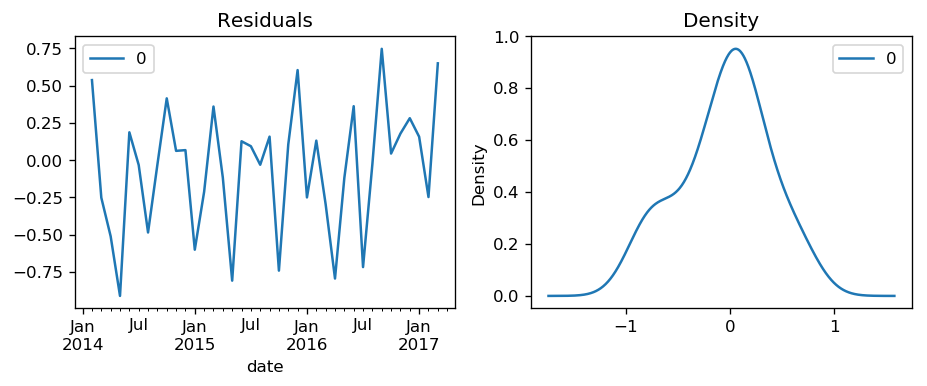

In [215]:
# Plot residual errors
residuals = pd.DataFrame(ma_model_log_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

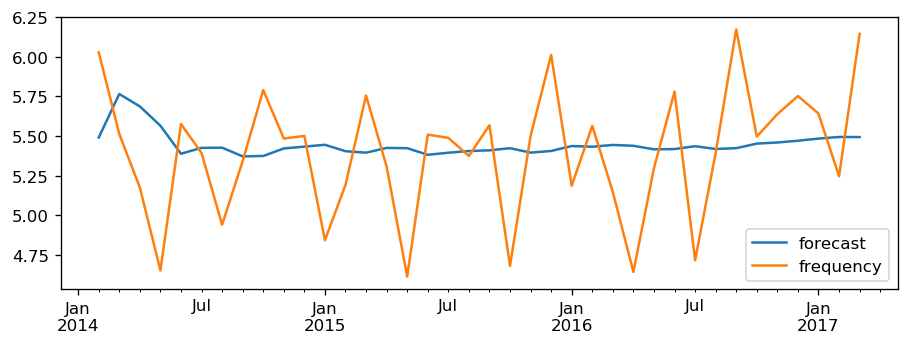

In [216]:
# Actual vs Fitted
ma_model_log_fit.plot_predict(dynamic=False)
plt.show()

C:\Users\Shreya\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\Shreya\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:            D.frequency   No. Observations:                   38
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -20.884
Method:                       css-mle   S.D. of innovations              0.399
Date:                Wed, 14 Aug 2019   AIC                             47.769
Time:                        19:04:47   BIC                             52.682
Sample:                    02-28-2014   HQIC                            49.517
                         - 03-31-2017                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0059      0.006      1.033      0.309      -0.005       0.017
ma.L1.D.frequency    -1.0000      0.089    -11.264      0.000      -1.174      -0.826
                        

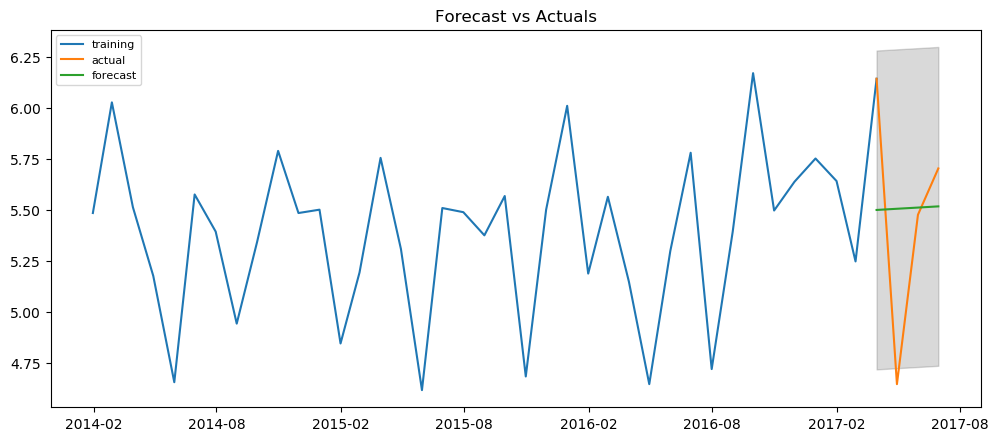

In [218]:
# Build Model
 
ma_model_log = ARIMA(Train_log, order=(0, 1, 1)) 
fitted = ma_model_log.fit(disp=0)
print(fitted.summary())
# Forecast
fc, se, conf = fitted.forecast(4, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=valid_log.index)
lower_series = pd.Series(conf[:, 0], index=valid_log.index)
upper_series = pd.Series(conf[:, 1], index=valid_log.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Train_log, label='training')
plt.plot(valid_log, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [219]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-valid_log)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, valid_log)

{'mape': 0.08235152627937405,
 'me': 0.016459032228393733,
 'mae': 0.43177841442724074,
 'mpe': 0.01358532985580328,
 'rmse': 0.5461242735148059,
 'acf1': -0.4583269395919635,
 'corr': -0.1003104766983944,
 'minmax': 0.07508784815079439}

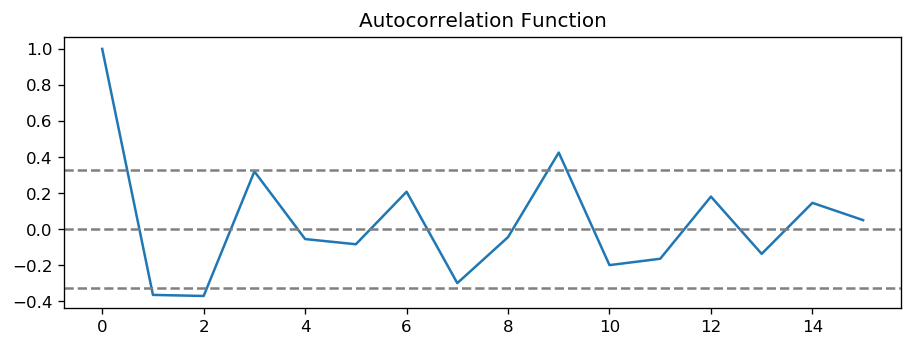

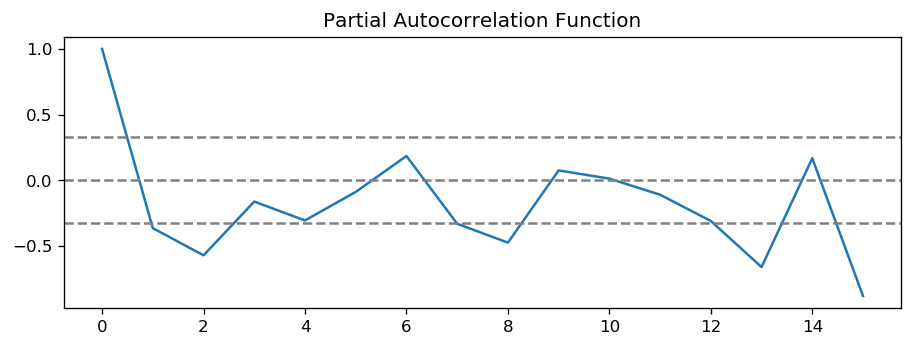

In [53]:
plt.plot(lag_acf) 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(train_diff.dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(train_diff.dropna())),linestyle='--',color='gray') 
plt.title('Autocorrelation Function') 
plt.show() 
plt.plot(lag_pacf) 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(train_diff.dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(train_diff.dropna())),linestyle='--',color='gray') 
plt.title('Partial Autocorrelation Function') 
plt.show()

In [ ]:
# Without using Transformation

In [ ]:
#p value is the lag value where the PACF chart crosses the upper confidence interval for the first time. It can be noticed that in this case p=0.5.
#q value is the lag value where the ACF chart crosses the upper confidence interval for the first time. It can be noticed that in this case q=0.5.
#d=0 as there is no stationarity in the series
#Now we will make the ARIMA model as we have the p,q values. We will make the AR and MA model separately and then combine them together.

In [103]:
## AR Model

from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(Train, order=(0, 1, 1))  # here the q value is zero since it is just the AR model 
results_AR = model.fit(disp=-1)  
print(results_AR.summary())


                             ARIMA Model Results                              
Dep. Variable:            D.frequency   No. Observations:                   36
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -213.806
Method:                       css-mle   S.D. of innovations             87.353
Date:                Sun, 11 Aug 2019   AIC                            433.611
Time:                        12:53:00   BIC                            438.362
Sample:                    02-28-2014   HQIC                           435.269
                         - 01-31-2017                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.0913      1.345      0.811      0.423      -1.545       3.727
ma.L1.D.frequency    -1.0000      0.090    -11.154      0.000      -1.176      -0.824
                        

C:\Users\Shreya\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\Shreya\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


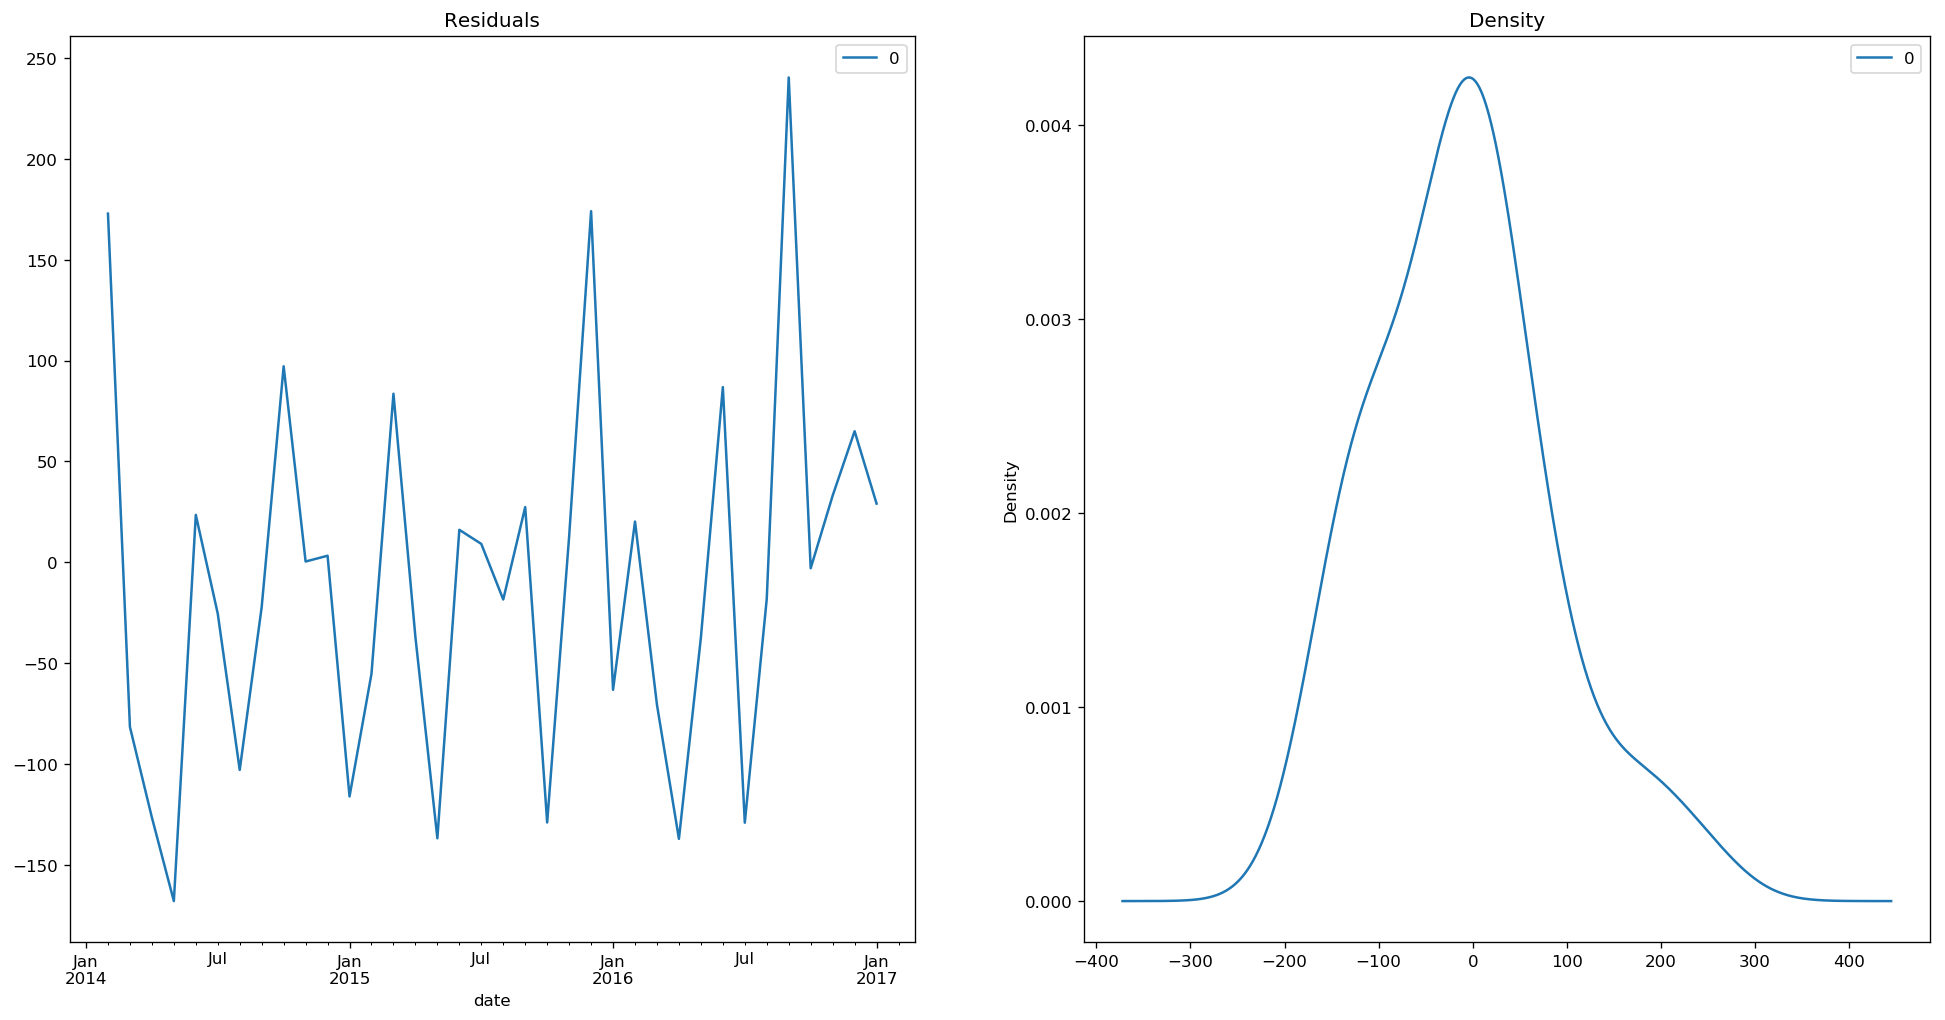

In [104]:
# Plot residual errors
residuals = pd.DataFrame(results_AR.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

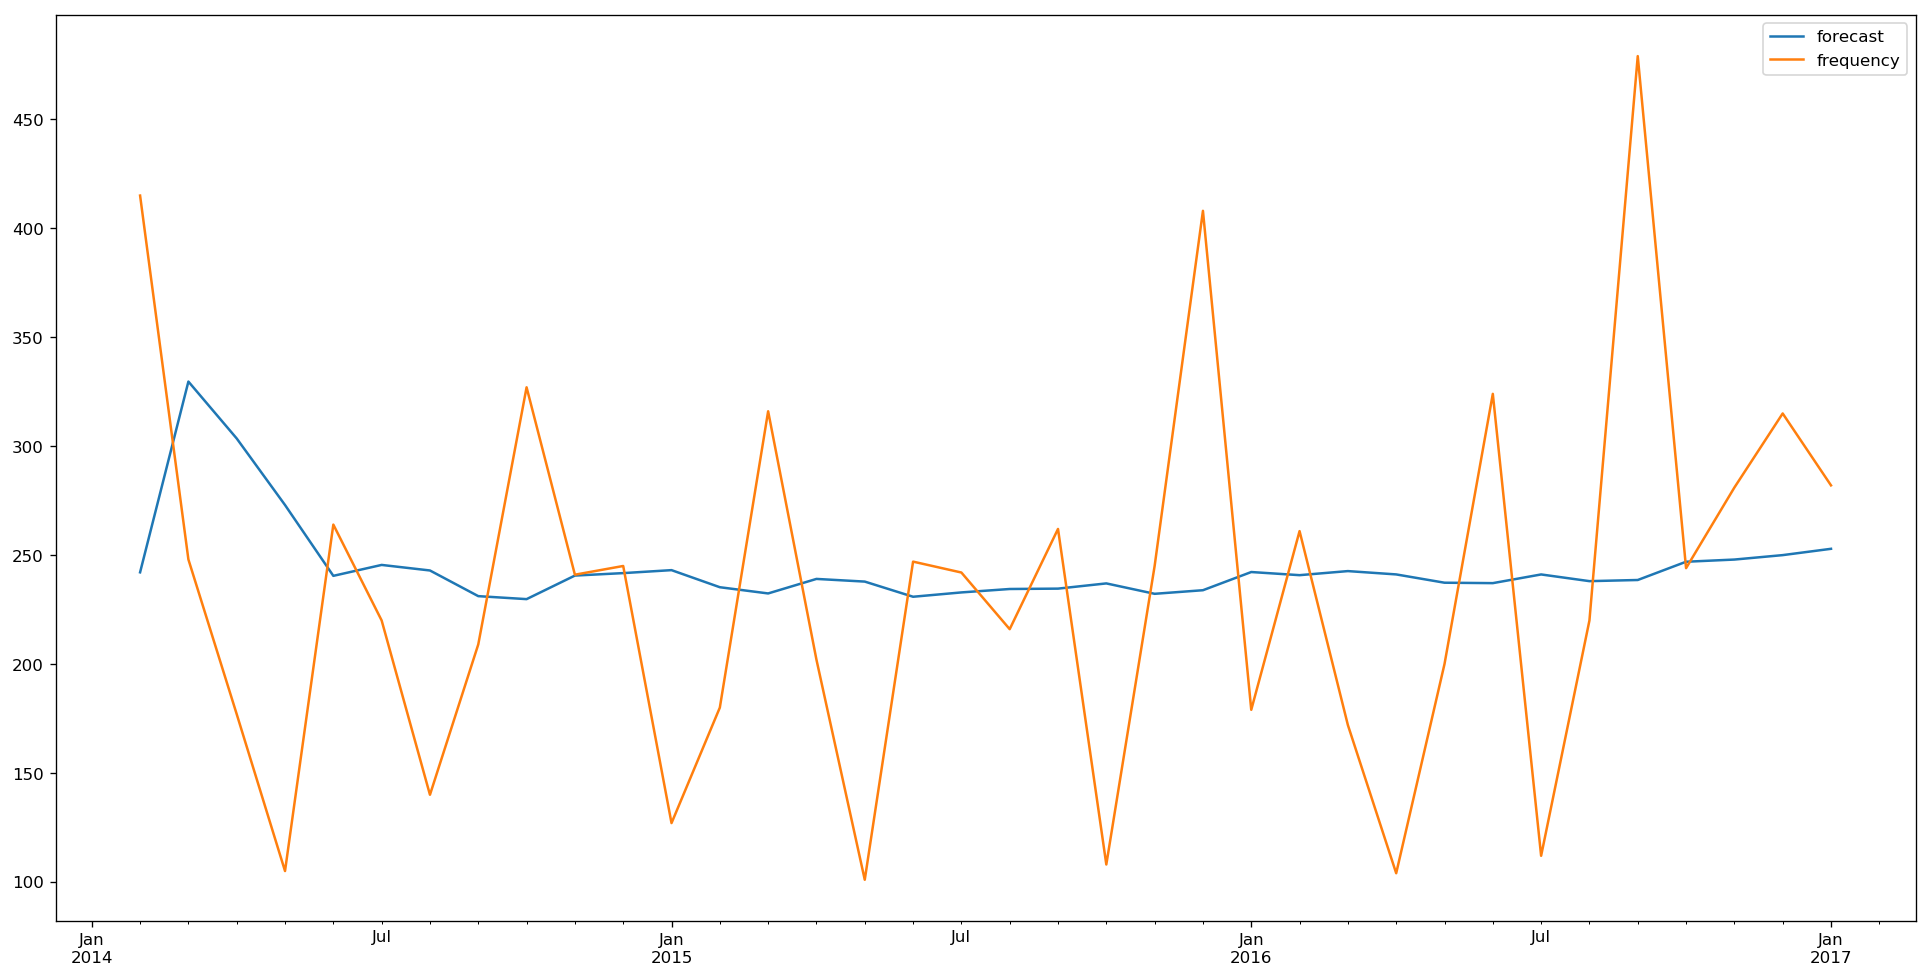

In [105]:
# Actual vs Fitted
results_AR.plot_predict(dynamic=False)
plt.show()

C:\Users\Shreya\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\Shreya\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:            D.frequency   No. Observations:                   36
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -213.806
Method:                       css-mle   S.D. of innovations             87.353
Date:                Sun, 11 Aug 2019   AIC                            433.611
Time:                        13:45:09   BIC                            438.362
Sample:                    02-28-2014   HQIC                           435.269
                         - 01-31-2017                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.0913      1.345      0.811      0.423      -1.545       3.727
ma.L1.D.frequency    -1.0000      0.090    -11.154      0.000      -1.176      -0.824
                        

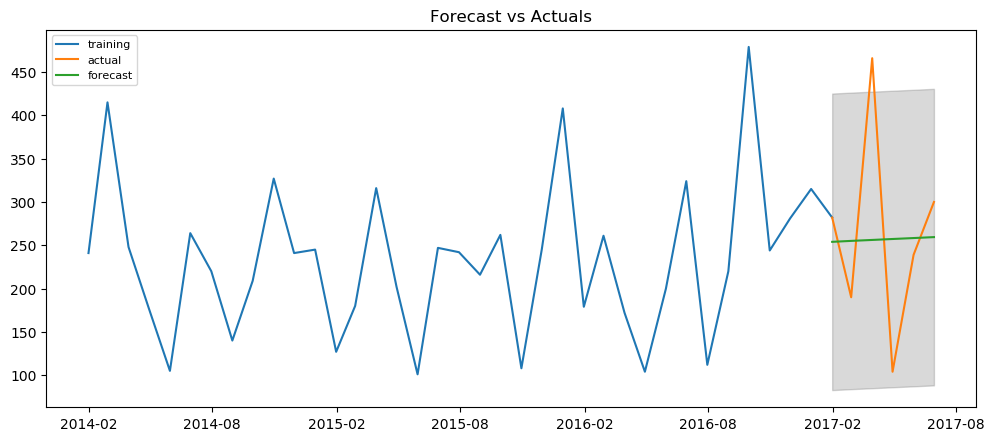

In [146]:
# Build Model
model = ARIMA(Train, order=(0, 1, 1))  # here the q value is zero since it is just the AR model 
results_AR = model.fit(disp=0)

print(results_AR.summary())
# Forecast
fc_2, se_2, conf_2 = results_AR.forecast(6, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series_2 = pd.Series(fc_2, index=valid.index)
lower_series_2 = pd.Series(conf_2[:, 0], index=valid.index)
upper_series_2 = pd.Series(conf_2[:, 1], index=valid.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Train, label='training')
plt.plot(valid, label='actual')
plt.plot(fc_series_2, label='forecast')
plt.fill_between(lower_series_2.index, lower_series_2, upper_series_2, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [166]:
def forecast_accuracy(forecast, actual):
    mape_2 = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf2 = acf(fc_2-np.asarray(valid['frequency']))[1]                      # ACF1
    return({'mape':mape_2, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf2, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc_2, np.asarray(valid['frequency']))

{'mape': 0.4303047415930701,
 'me': -6.797491500981167,
 'mae': 86.01521256559953,
 'mpe': 0.20199807553433022,
 'rmse': 111.47345364343242,
 'acf1': -0.6100257481876982,
 'corr': -0.05487607412611312,
 'minmax': 0.2684325299640401}

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())